In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [20]:
data = pd.read_csv("/kaggle/input/daily-sales-352-df/daily_sales_352_df.csv")

In [133]:
data

,item,user,rating,timestamp,description,title,date
0,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
1,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
2,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
3,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
4,B0000CFH7B,A3C5231O0WQX10,5.000,1296000000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-01-26
...,...,...,...,...,...,...,...
818605,B01GH3JVZI,A2UPCGGZ0FU3XZ,5.000,1534982400,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-23
818606,B01GH3JVZI,A1MJ18Y373RTFE,1.000,1534636800,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-19
818607,B01GH3JVZI,A2KZ6WK0HWB2TD,5.000,1534464000,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-17
818608,B01GH3JVZI,A3UBTA2DJ27IWF,2.000,1534464000,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-17


In [22]:
data['item'].value_counts().to_frame().iloc[:350]

,item
B0001LO3FG,13716
B00BUKL666,11526
B00542YXFW,9083
B008QMX2SG,8903
B00D3M2QP4,8880
...,...
B003VXFK44,1152
B010FBXO38,1150
B01D19RF3Q,1149
B00S0ABRNQ,1147


In [23]:
cat_top_50 = data['item'].value_counts()[:350].index

In [24]:
filtered_df = data[data['item'].isin(cat_top_50)]

In [25]:
filtered_df

,item,user,rating,timestamp,description,title,date
0,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
1,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
2,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
3,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
4,B0000CFH7B,A3C5231O0WQX10,5.000,1296000000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-01-26
...,...,...,...,...,...,...,...
818605,B01GH3JVZI,A2UPCGGZ0FU3XZ,5.000,1534982400,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-23
818606,B01GH3JVZI,A1MJ18Y373RTFE,1.000,1534636800,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-19
818607,B01GH3JVZI,A2KZ6WK0HWB2TD,5.000,1534464000,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-17
818608,B01GH3JVZI,A3UBTA2DJ27IWF,2.000,1534464000,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-17


# Start of making 'date' column

In [26]:
data_ = data.copy()

In [27]:
data_['date'] = pd.to_datetime(data_['timestamp'], unit='s').dt.tz_localize(None)

In [28]:
data_.head()

,item,user,rating,timestamp,description,title,date
0,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
1,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
2,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
3,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
4,B0000CFH7B,A3C5231O0WQX10,5.000,1296000000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-01-26


# END of making 'date' column

# START of Создание daily_sales_df
отделяем отдельный товар и создаём колонку c количеством продаж в день

In [29]:
def show_daily_sales(product_id_number):

    data_temp = data_.query(f'item == "{product_id_number}"').copy()
    daily_sales_temp = data_temp.groupby('date')['item'].count()
    daily_sales_temp_df = daily_sales_temp.reset_index()
    daily_sales_temp_df = daily_sales_temp_df.rename(columns={'item': 'daily_sales'})

    return daily_sales_temp_df

In [110]:
products_sales_df = pd.DataFrame( columns=['product_id', 'sales'])

In [31]:
%%time
datasets = {}
for i in data_['item'].value_counts().to_frame().iloc[:350].index:
    name = f'{i}'
    dfs = show_daily_sales(i)
    datasets[name] = dfs


CPU times: user 9.08 s, sys: 71.1 ms, total: 9.15 s
Wall time: 9.11 s


In [32]:
datasets.keys()

dict_keys(['B0001LO3FG', 'B00BUKL666', 'B00542YXFW', 'B008QMX2SG', 'B00D3M2QP4', 'B000168QTU', 'B0001ES9FI', 'B000YN2GVY', 'B000X3TPHS', 'B01E5XTW24', 'B000F4DKAI', 'B000EVMNMI', 'B002HQCWYM', 'B00DS842HS', 'B000Z93FQC', 'B00CPZPYLS', 'B000H2XXRS', 'B00PFDH0IC', 'B00EDHW7K2', 'B00C1LXBFC', 'B00M2OGS08', 'B003OGKCDC', 'B00XA8XWGS', 'B005K4Q1T0', 'B007JINB0W', 'B006CNTR6W', 'B00KCCKV8W', 'B006IOKA9S', 'B00WBUX2UM', 'B00R7PWK7W', 'B0014WYXYW', 'B0010BQB6A', 'B00112O8NG', 'B004JM3VF6', 'B000WV0RW8', 'B00K2RY8GI', 'B00KSN9TME', 'B008MOMYRI', 'B00014JNI0', 'B00028MOQS', 'B0131A6FJA', 'B00EDADBSQ', 'B000HDK0DC', 'B000U0OUP6', 'B000E1FZHS', 'B00EKLPLU4', 'B0009F3PM6', 'B000PDY3P0', 'B009OWOKFQ', 'B00H889MGK', 'B0027Z5J6G', 'B0001M0Z6Q', 'B000GW0U9I', 'B0045IO2VQ', 'B01GH3JVZI', 'B005K4Q1YA', 'B009E7YBEQ', 'B0010SEVWO', 'B005HB19KW', 'B001534QYW', 'B00I4W2VX0', 'B000WGB3OY', 'B006CQ1ZHI', 'B000LL0R8I', 'B01EUEIL3E', 'B0019K980I', 'B0000CFPI2', 'B000HRS7OM', 'B000NE6H82', 'B008I1XNMU', 'B00012NH

In [39]:
filtered_df

,item,user,rating,timestamp,description,title,date
0,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
1,B0000CFH7B,A3SJ6OST09HD86,1.000,1309737600,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-07-04
2,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
3,B0000CFH7B,A3I7WIYAQMJNTF,1.000,1305936000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-05-21
4,B0000CFH7B,A3C5231O0WQX10,5.000,1296000000,['Wilton-color mist food color spray. This eas...,"Wilton 710-5506 Color Mist Spray 1.5oz, Black",2011-01-26
...,...,...,...,...,...,...,...
818605,B01GH3JVZI,A2UPCGGZ0FU3XZ,5.000,1534982400,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-23
818606,B01GH3JVZI,A1MJ18Y373RTFE,1.000,1534636800,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-19
818607,B01GH3JVZI,A2KZ6WK0HWB2TD,5.000,1534464000,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-17
818608,B01GH3JVZI,A3UBTA2DJ27IWF,2.000,1534464000,['The ViSalus Vi-Shape nutritional shake mix i...,ViSalus Nutritional Meal Replacement Shake Mix...,2018-08-17


# END of Создание daily_sales_df

# Start of ensemble Keras LSTM & Prophet

In [42]:
data_['item'].value_counts()

B0001LO3FG    13716
B00BUKL666    11526
B00542YXFW     9083
B008QMX2SG     8903
B00D3M2QP4     8880
              ...  
B01D19RF3Q     1149
B00S0ABRNQ     1147
B00269VK20     1143
B005Y1L0BS     1142
B00623HKBQ     1141
Name: item, Length: 352, dtype: int64

In [43]:
# Функция для разделения данных на обучающую и тестовую выборки
def train_test_split(dataset, test_size):
    split_index = len(dataset) - test_size
    train = dataset.iloc[:split_index]
    test = dataset.iloc[split_index:]

    return train, test

In [44]:

# Функция для преобразования данных в формат, пригодный для LSTM
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])

    return np.array(Xs), np.array(ys)


In [45]:

# Функция для создания и обучения LSTM модели
def train_lstm(train, time_steps, epochs, batch_size):
    # Нормализация данных
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))

    # Преобразование данных для LSTM
    X_train, y_train = create_dataset(pd.DataFrame(train_scaled), pd.DataFrame(train_scaled), time_steps)

    # Создание и компиляция LSTM модели
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', input_shape=(time_steps, 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(256, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    # Обучение модели с ранней остановкой
    early_stop = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stop])

    return  model, scaler

In [46]:

def train_prophet(train):
    # Лучшие гиперпараметры:
    best_params = {'changepoint_prior_scale': 0.88, 'seasonality_prior_scale': 0.081, 'holidays_prior_scale': 0.081, 'daily_seasonality': True}

    train_prophet = train.reset_index().rename(columns={'date': 'ds', 'sale': 'y'})

    # Создание и обучение модели Prophet
    model = Prophet(**best_params)
    model.fit(train_prophet)

    return model

# Функция для оценки прогнозов
def evaluate_predictions(y_true, y_pred):
    if y_pred.size > 0 and y_true.size == y_pred.size:
        return mean_absolute_error(y_true, y_pred)
    else:
        return None

In [47]:

# Функция для прогнозирования с использованием обученных моделей и их ансамбля

def ens_predict(dataset, models, time_steps, test_size):
    lstm_model, lstm_scaler = models['lstm']
    prophet_model = models['prophet']

    # Прогнозирование с использованием LSTM
    test_lstm = lstm_scaler.transform(dataset[-(time_steps + test_size):].values.reshape(-1, 1))
    X_test_lstm, _ = create_dataset(pd.DataFrame(test_lstm), pd.DataFrame(test_lstm), time_steps)

    if len(X_test_lstm) == 0:
        X_test_lstm = np.zeros((1, time_steps, 1))

    lstm_preds = lstm_model.predict(X_test_lstm)

    lstm_preds = lstm_scaler.inverse_transform(lstm_preds)

    # Обрезаем результаты LSTM до размера истинных значений
    lstm_preds = lstm_preds.flatten()[:test_size]

    # Прогнозирование с использованием Prophet
    future = prophet_model.make_future_dataframe(periods=test_size, freq='6H')
    forecast = prophet_model.predict(future)
    prophet_preds = forecast['yhat'].iloc[-test_size:].values.reshape(-1, 1)

    # Ансамбль с использованием взвешенного среднего
    ensemble_preds = (lstm_preds.reshape(-1, 1) * 0.5) + (prophet_preds * 0.5)

    return lstm_preds.reshape(-1, 1), prophet_preds, ensemble_preds



In [49]:
data_['item'].value_counts()

B0001LO3FG    13716
B00BUKL666    11526
B00542YXFW     9083
B008QMX2SG     8903
B00D3M2QP4     8880
              ...  
B01D19RF3Q     1149
B00S0ABRNQ     1147
B00269VK20     1143
B005Y1L0BS     1142
B00623HKBQ     1141
Name: item, Length: 352, dtype: int64

In [87]:
keys_data_350 = list(datasets.keys())#['B0009X5J5O']

In [89]:
print(keys_data_350)

['B0001LO3FG', 'B00BUKL666', 'B00542YXFW', 'B008QMX2SG', 'B00D3M2QP4', 'B000168QTU', 'B0001ES9FI', 'B000YN2GVY', 'B000X3TPHS', 'B01E5XTW24', 'B000F4DKAI', 'B000EVMNMI', 'B002HQCWYM', 'B00DS842HS', 'B000Z93FQC', 'B00CPZPYLS', 'B000H2XXRS', 'B00PFDH0IC', 'B00EDHW7K2', 'B00C1LXBFC', 'B00M2OGS08', 'B003OGKCDC', 'B00XA8XWGS', 'B005K4Q1T0', 'B007JINB0W', 'B006CNTR6W', 'B00KCCKV8W', 'B006IOKA9S', 'B00WBUX2UM', 'B00R7PWK7W', 'B0014WYXYW', 'B0010BQB6A', 'B00112O8NG', 'B004JM3VF6', 'B000WV0RW8', 'B00K2RY8GI', 'B00KSN9TME', 'B008MOMYRI', 'B00014JNI0', 'B00028MOQS', 'B0131A6FJA', 'B00EDADBSQ', 'B000HDK0DC', 'B000U0OUP6', 'B000E1FZHS', 'B00EKLPLU4', 'B0009F3PM6', 'B000PDY3P0', 'B009OWOKFQ', 'B00H889MGK', 'B0027Z5J6G', 'B0001M0Z6Q', 'B000GW0U9I', 'B0045IO2VQ', 'B01GH3JVZI', 'B005K4Q1YA', 'B009E7YBEQ', 'B0010SEVWO', 'B005HB19KW', 'B001534QYW', 'B00I4W2VX0', 'B000WGB3OY', 'B006CQ1ZHI', 'B000LL0R8I', 'B01EUEIL3E', 'B0019K980I', 'B0000CFPI2', 'B000HRS7OM', 'B000NE6H82', 'B008I1XNMU', 'B00012NHAC', 'B001

In [91]:
datasets["B000EVN2ZK"]

,date,daily_sales
0,2006-07-03,1
1,2006-07-24,1
2,2006-08-05,1
3,2006-09-26,1
4,2006-12-08,1
...,...,...
919,2018-05-07,1
920,2018-05-11,2
921,2018-05-15,1
922,2018-05-17,1


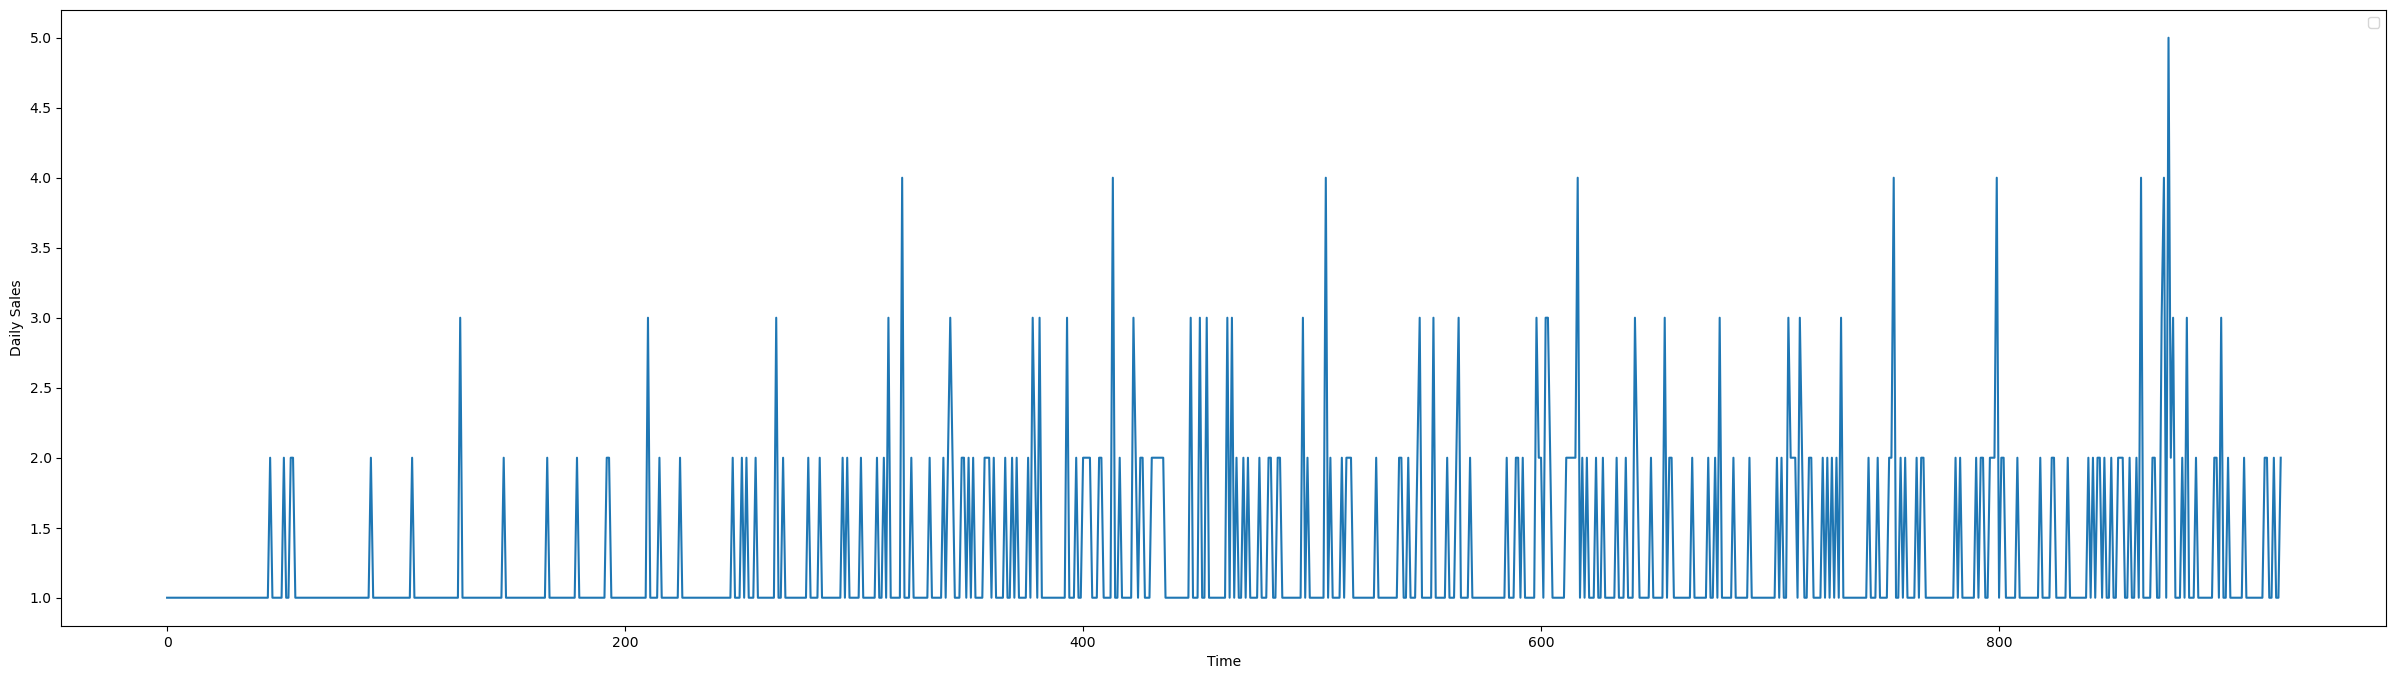

In [90]:
x = datasets["B000EVN2ZK"].copy()

fig = plt.figure(figsize=(30, 8))
plt.plot(x['daily_sales'])
plt.xlabel('Time')
plt.ylabel('Daily Sales')
plt.legend()
plt.show()

In [108]:
ds = ["B008QMX2SG", 'B003VXFK44']

In [118]:
%%time
for i in ds:#datasets.keys():
    time_series_df = pd.DataFrame()
    time_series_df = datasets[i][-900:].copy()
    time_series_df = time_series_df.rename(columns={'daily_sales': 'sale'})
    time_series_df.set_index('date', inplace=True)

    # Определение параметров моделей и ансамбля
    time_steps = 30
    test_size = 100 #* 4 # 30 дней, с шагом в 6 часов
    epochs = 50
    batch_size = 64

    # Разделение данных на обучающую и тестовую выборки
    train_data, test_data = train_test_split(time_series_df, test_size)

    # Обучение моделей
    lstm_model, lstm_scaler = train_lstm(train_data['sale'], time_steps, epochs, batch_size)
    prophet_model = train_prophet(train_data)

    models = {'lstm': (lstm_model, lstm_scaler), 'prophet': prophet_model}

    # Прогнозирование и оценка результатов
    lstm_preds, prophet_preds, ensemble_preds = ens_predict(time_series_df, models, time_steps, test_size)
    value = ensemble_preds[-30:]
    products_sales_df = products_sales_df.append({'product_id': i, 'sales': value.flatten().tolist()}, ignore_index=True)
    print(products_sales_df.shape)

Epoch 1/50
10/10 [==============================] - 11s 599ms/step - loss: 0.0352 - val_loss: 0.0407
Epoch 2/50
10/10 [==============================] - 6s 565ms/step - loss: 0.0337 - val_loss: 0.0406
Epoch 3/50
10/10 [==============================] - 5s 534ms/step - loss: 0.0343 - val_loss: 0.0416
Epoch 4/50
10/10 [==============================] - 5s 538ms/step - loss: 0.0339 - val_loss: 0.0413
Epoch 5/50
10/10 [==============================] - 5s 529ms/step - loss: 0.0337 - val_loss: 0.0413
Epoch 6/50
10/10 [==============================] - 5s 540ms/step - loss: 0.0336 - val_loss: 0.0422
Epoch 7/50
10/10 [==============================] - 5s 529ms/step - loss: 0.0333 - val_loss: 0.0423


15:26:24 - cmdstanpy - INFO - Chain [1] start processing
15:26:24 - cmdstanpy - INFO - Chain [1] done processing


4/4 [==============================] - 1s 81ms/step
(3, 2)
Epoch 1/50
10/10 [==============================] - 11s 606ms/step - loss: 0.0305 - val_loss: 0.0173
Epoch 2/50
10/10 [==============================] - 5s 525ms/step - loss: 0.0230 - val_loss: 0.0204
Epoch 3/50
10/10 [==============================] - 5s 549ms/step - loss: 0.0200 - val_loss: 0.0160
Epoch 4/50
10/10 [==============================] - 5s 539ms/step - loss: 0.0193 - val_loss: 0.0176
Epoch 5/50
10/10 [==============================] - 6s 544ms/step - loss: 0.0191 - val_loss: 0.0164
Epoch 6/50
10/10 [==============================] - 5s 534ms/step - loss: 0.0192 - val_loss: 0.0179
Epoch 7/50
10/10 [==============================] - 5s 541ms/step - loss: 0.0196 - val_loss: 0.0167
Epoch 8/50
10/10 [==============================] - 5s 530ms/step - loss: 0.0191 - val_loss: 0.0167


15:27:54 - cmdstanpy - INFO - Chain [1] start processing
15:27:54 - cmdstanpy - INFO - Chain [1] done processing


4/4 [==============================] - 1s 78ms/step
(4, 2)
CPU times: user 4min 14s, sys: 9.38 s, total: 4min 23s
Wall time: 2min 20s


In [67]:
# products_sales_df_352 = products_sales_df.copy()

In [119]:
products_sales_df

,product_id,sales
0,B000EVN2ZK,"[1.361324529714882, 1.3561472653252737, 1.3516..."
1,B0001LO3FG,"[7.697722922130277, 7.66037167657155, 7.705241..."
2,B000EVN2ZK,"[1.4898599196150895, 1.4798941968781607, 1.470..."
3,B0001LO3FG,"[7.617562542720487, 7.580170050747576, 7.62474..."


In [115]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def calculate_standardized_sales(sales):
    # Вычисляем среднее значение продаж для товара
    average_sales = np.mean(sales)

    # Вычисляем стандартизированное значение продаж
    standardized_sales = (average_sales - mean_value) / std_value

    return standardized_sales

In [120]:
%%time
# Создаем пустой датафрейм product_multipliers с колонками "product_id" и "multiplier"
product_multipliers = pd.DataFrame(columns=['product_id', 'multiplier'])

# # Вычисляем среднее значение и стандартное отклонение для всех товаров
all_sales = np.concatenate(products_sales_df['sales'].to_numpy())
mean_value = np.mean(all_sales)
std_value = np.std(all_sales)

# Обрабатываем товары по одному и вычисляем стандартизированные значения продаж
standardized_sales_list = []
for _, row in products_sales_df.iterrows():
    standardized_sales_list.append(calculate_standardized_sales(row['sales']))

# Вычисляем множители с помощью функции softmax
multipliers = softmax(standardized_sales_list)

# Создаем датафрейм product_multipliers с колонками "product_id" и "multiplier"
product_multipliers = pd.DataFrame({'product_id': products_sales_df['product_id'], 'multiplier': multipliers})

print(product_multipliers)

   product_id  multiplier
0  B000EVN2ZK       0.059
1  B0001LO3FG       0.447
2  B000EVN2ZK       0.061
3  B0001LO3FG       0.434
CPU times: user 8.26 ms, sys: 1.02 ms, total: 9.28 ms
Wall time: 8.3 ms


In [122]:
product_multipliers

,product_id,multiplier
0,B000EVN2ZK,0.059
1,B0001LO3FG,0.447
2,B000EVN2ZK,0.061
3,B0001LO3FG,0.434
